In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Procedure 1: Train and test on the entire dataset

1. Train the model on the **entire dataset.**
2. Test the model on the **same dataset** , and evaluate how well we did by comparing the predicted response values with the true response values.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y= iris.target

# Logistics Regression

In [3]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
#predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
len(logreg.predict(X))

150

   ## classification accuracy
   * **proportion** of correct predictions
   * common **evaluation metric** for classification problems

In [5]:
# compute classification accuracy for logistics regression model
from sklearn import metrics
print (metrics.accuracy_score(y,logreg.predict(X)))

0.96


* known as **training accuracy** when you train and test the model on the same data

# KNN (K = 5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


# KNN (K = 1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


# Problem with training and testing on the same data
* Goal is to estimate likely perfomance of a model on **out-of-sample data**.
* But, maximizing training accuracy rewards **overly complex models** that wont necessarily generalize.
* Unnecessarily complex models **overfit** the training data.

# Procedure 2: Train/ Test split
1. Split the dataset into two pieces: **training set** and **testing set**
2. Train the model on the **training set**
3. Test the model on the **testing set**, and evaluate how well we did.

In [8]:
#STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4, random_state = 4) #test_size defines amount of size for test data. in this case, it is 40%.
#random_state splits the data the exact same way every time.

## What do we accomplish using this procedure?
* Model can be trained and tested on **different data**.
* Response values are known for the training set, and thus **predictions can be evaluated**.
* **Testing accuracy** is a better estimate than **training accuracy** on **out-of-sample performance**.

In [9]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [10]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [11]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [12]:
#STEP 2: Train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


# Repeat for KNN with K = 5

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


# Repeat for KNN with K = 1

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


# Can we locate an even better value for K?

In [16]:
# try k=1 through k=25 and record testing accuracy
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


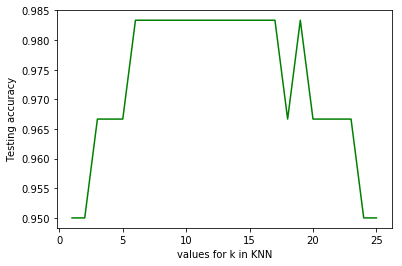

In [17]:
#import matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

#allow plots to appear within the notebook
%matplotlib inline

#plot the relation ship between k and the testing accuracy
plt.plot(k_range, scores, 'g-') # third parameter defines type and color of the line. -- dotted line, ^ triangles, s squares.
plt.xlabel('values for k in KNN')
plt.ylabel('Testing accuracy')
plt.show() #displays the figures

* **Training accuracy** rises as model complexity increases
* **Testing accuracy** penalizes models that are too complex or not complex enough.
* For KNN models, complexity is determined by the **value of k** (lower value = more complex)

# Making prediction on out-of-sample data

In [18]:
#instantiate the model with the best known parameter
knn = KNeighborsClassifier(n_neighbors=11)

#train the model with X and y (not X_train and y_train)
knn.fit(X,y)

#make prediction for an out-of-sample data
knn.predict([[3,5,4,2]]) #use 2D array otherwise it will give a valueError. Alternatively use reshape(1,-1) or reshape(-1,1) as below.

array([1])

In [19]:
a = np.array([3,5,4,2])
a.shape
a.reshape(1,-1)

array([[3, 5, 4, 2]])

In [20]:
a.reshape(-1,1)

array([[3],
       [5],
       [4],
       [2]])

# Downside of train/test split
* Provides a **high-variance estimate** of out of sample accuracy
* **K-fold cross-validation** overcomes this limitation
* But, train/test split is still useful because of its **flexibility & speed**